<img src="https://github.com/s-simin/images/blob/main/healthcare_SG.png?raw=true" style="float: left; margin: 0px 20px 0px 0px; height: 155px;">  

<h1 style="font-family: Segoe UI; color: #3366cc; line-height: 1.3;"><strong>A Preliminary Analysis</strong><br>
Manpower Resource Planning for SGH Emergency Department</h1>

<div style="text-align: right;">
<h3>Author : Suen Si Min<br>
</div>
<br>
<br>

---

**Problem Statement:** <br><br>
How differences in attendance numbers at SGH's emergency department can assist policy makers in manpower resource planning.
<br>
<br>

**Glossary of Terms:** <br>
- ED: Emergency Department
- SGH: Singapore General Hospital
- PH: Public Holiday(s)

**Datasource** <br>
- Attendances at Emergency Medicine Departments. Data from Ministry of Health (MOH) [Link here](https://www.moh.gov.sg/resources-statistics/healthcare-institution-statistics/attendances-at-emergency-medicine-departments)

**Data Dictionary** <br>
These statistics are reported for: 
- Urgent Care Clinic at Alexandra Hospital (AH)
- Emergency Medicine Departments (EMD) at Changi General Hospital (CGH)
- Khoo Teck Puat Hospital (KTPH)
- National University Hospital (NUH) (Adults)
- Ng Teng Fong General Hospital (NTFGH)
- Sengkang General Hospital (SKH)
- Singapore General Hospital (SGH)
- Tan Tock Seng Hospital (TTSH)

Attendances at Emergency Medicine Departments (EMD) comprise of daily attendance figures include all patients who are presented at the EMD regardless of urgency of medical conditions.

---
# 1. Imports

In [433]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

from scipy.stats import levene, ttest_ind

from datetime import datetime

# Set a random seed to reproduce the same results across all.
np.random.seed(42)

---
# 2. Data Cleaning

In [434]:
# Read csv
df = pd.read_csv('../data/daily_ED_Attendances_by_Hospital.csv')

In [435]:
# Check shape   
df.shape

(511, 13)

In [436]:
# Display first 20 rows
df.head(20)

,Date,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,"Sun, 01/01/23",64,351,286,252,257,309,333,336,NaN,NaN,NaN,NaN
1,"Mon, 02/01/23",61,386,326,314,334,342,346,370,NaN,NaN,NaN,NaN
2,"Tue, 03/01/23",76,436,401,364,352,343,397,422,NaN,NaN,NaN,NaN
3,"Wed, 04/01/23",74,354,311,330,286,305,327,361,NaN,NaN,NaN,NaN
4,"Thu, 05/01/23",61,373,335,320,309,337,351,366,NaN,NaN,NaN,NaN
5,"Fri, 06/01/23",49,353,305,287,304,302,340,350,NaN,NaN,NaN,NaN
6,"Sat, 07/01/23",48,296,296,274,268,286,309,391,NaN,NaN,NaN,NaN
7,"Sun, 08/01/23",56,342,273,255,268,257,359,278,NaN,NaN,NaN,NaN
8,"Mon, 09/01/23",83,398,379,382,341,359,409,426,NaN,NaN,NaN,NaN
9,"Tue, 10/01/23",59,389,374,350,319,301,336,382,NaN,NaN,NaN,NaN


In [437]:
# Remove unwanted columns
df = df.iloc[:,0:9]

In [438]:
# Display first 20 rows to check
print(df.shape)
df.head(20)

(511, 9)


,Date,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH
0,"Sun, 01/01/23",64,351,286,252,257,309,333,336
1,"Mon, 02/01/23",61,386,326,314,334,342,346,370
2,"Tue, 03/01/23",76,436,401,364,352,343,397,422
3,"Wed, 04/01/23",74,354,311,330,286,305,327,361
4,"Thu, 05/01/23",61,373,335,320,309,337,351,366
5,"Fri, 06/01/23",49,353,305,287,304,302,340,350
6,"Sat, 07/01/23",48,296,296,274,268,286,309,391
7,"Sun, 08/01/23",56,342,273,255,268,257,359,278
8,"Mon, 09/01/23",83,398,379,382,341,359,409,426
9,"Tue, 10/01/23",59,389,374,350,319,301,336,382


In [439]:
# Check number of null values per column
df.isnull().sum()

Date      0
AH        0
CGH       0
KTPH      0
NTFGH     0
NUH(A)    0
SGH       0
SKH       0
TTSH      0
dtype: int64

In [440]:
# Show null count and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    511 non-null    object
 1   AH      511 non-null    int64 
 2   CGH     511 non-null    int64 
 3   KTPH    511 non-null    int64 
 4   NTFGH   511 non-null    int64 
 5   NUH(A)  511 non-null    int64 
 6   SGH     511 non-null    int64 
 7   SKH     511 non-null    int64 
 8   TTSH    511 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 36.1+ KB


In [441]:
# View summary statistics
df.describe()

,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,63.853229,364.849315,317.528376,320.741683,296.502935,316.645793,339.632094,363.722114
std,11.434210,39.398651,39.987384,40.268606,37.436685,34.459834,33.264561,38.546141
min,7.000000,251.000000,218.000000,205.000000,162.000000,208.000000,259.000000,274.000000
25%,56.000000,338.000000,287.000000,290.000000,270.000000,295.500000,315.000000,337.000000
50%,63.000000,361.000000,314.000000,319.000000,294.000000,315.000000,339.000000,362.000000
75%,71.000000,387.500000,346.000000,348.000000,319.000000,333.000000,359.000000,386.000000
max,98.000000,483.000000,431.000000,423.000000,442.000000,429.000000,440.000000,499.000000


## 2.1 Get an overview of data pattern and trend by generating a line plot for SGH

Generate a line plot for daily attendance at SGH, with time on the $x$-axis and count on the $y$-axis as an overview of the data patterns and trends.

In [442]:
# Create a line plot with Plotly Express
fig = px.line(df, x='Date', y='SGH', title='Daily Emergency Department Attendances (SGH)', labels={'SGH': 'Attendances', 'Date': 'Date'})

# Customize the figure size
fig.update_layout(width=2500, height=400, legend_title_text='Legend', title={'x': 0.5}, margin=dict(l=20, r=20, t=40, b=20))

# Show the plot
fig.show()

In [443]:
# Convert Date column to Datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%a, %d/%m/%y')

# Extract day of the week & year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

# View updated dataframe
df

,Date,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH,Year,Month,DayOfWeek
0,2023-01-01,64,351,286,252,257,309,333,336,2023,1,Sunday
1,2023-01-02,61,386,326,314,334,342,346,370,2023,1,Monday
2,2023-01-03,76,436,401,364,352,343,397,422,2023,1,Tuesday
3,2023-01-04,74,354,311,330,286,305,327,361,2023,1,Wednesday
4,2023-01-05,61,373,335,320,309,337,351,366,2023,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
506,2024-05-21,60,421,289,330,319,317,381,401,2024,5,Tuesday
507,2024-05-22,72,337,264,276,236,295,317,282,2024,5,Wednesday
508,2024-05-23,78,403,302,391,332,384,360,415,2024,5,Thursday
509,2024-05-24,55,353,270,307,309,329,359,383,2024,5,Friday


In [444]:
# Filter the dataframe for the year 2023
df_2023 = df[df['Year'] == 2023]

---
# 3. Exploratory Data Analysis

## 3.1 Generate a line plot for daily attendance at SGH in 2023

Generate a line plot for daily attendance at SGH in 2023, with time on the $x$-axis and count on the $y$-axis as an overview of the data patterns and trends.

In [445]:
# Create a line plot with Plotly Express
fig = px.line(df_2023, x='Date', y='SGH', title='Daily Emergency Department Attendances (SGH) in 2023', labels={'SGH': 'Attendances', 'Date': 'Date'})

# Customize the figure size
fig.update_layout(width=2500, height=300, legend_title_text='Legend', title={'x': 0.5}, margin=dict(l=20, r=20, t=40, b=20))

# Update x-axis to show all months and add grid lines
fig.update_xaxes(dtick="M1", showgrid=True)
fig.update_yaxes(showgrid=True)

# Show the plot
fig.show()

## 3.2 Export 2023 Dataframe to CSV

In [446]:
df_2023.to_csv('../data/daily_ED_Attendances_by_Hospital_2023.csv')

In [416]:
# Create a filter by creating a list of hospitals
hospitals = ['SGH']

## 3.3 Compare Attendance by Day of Week, Month on Month (MoM)

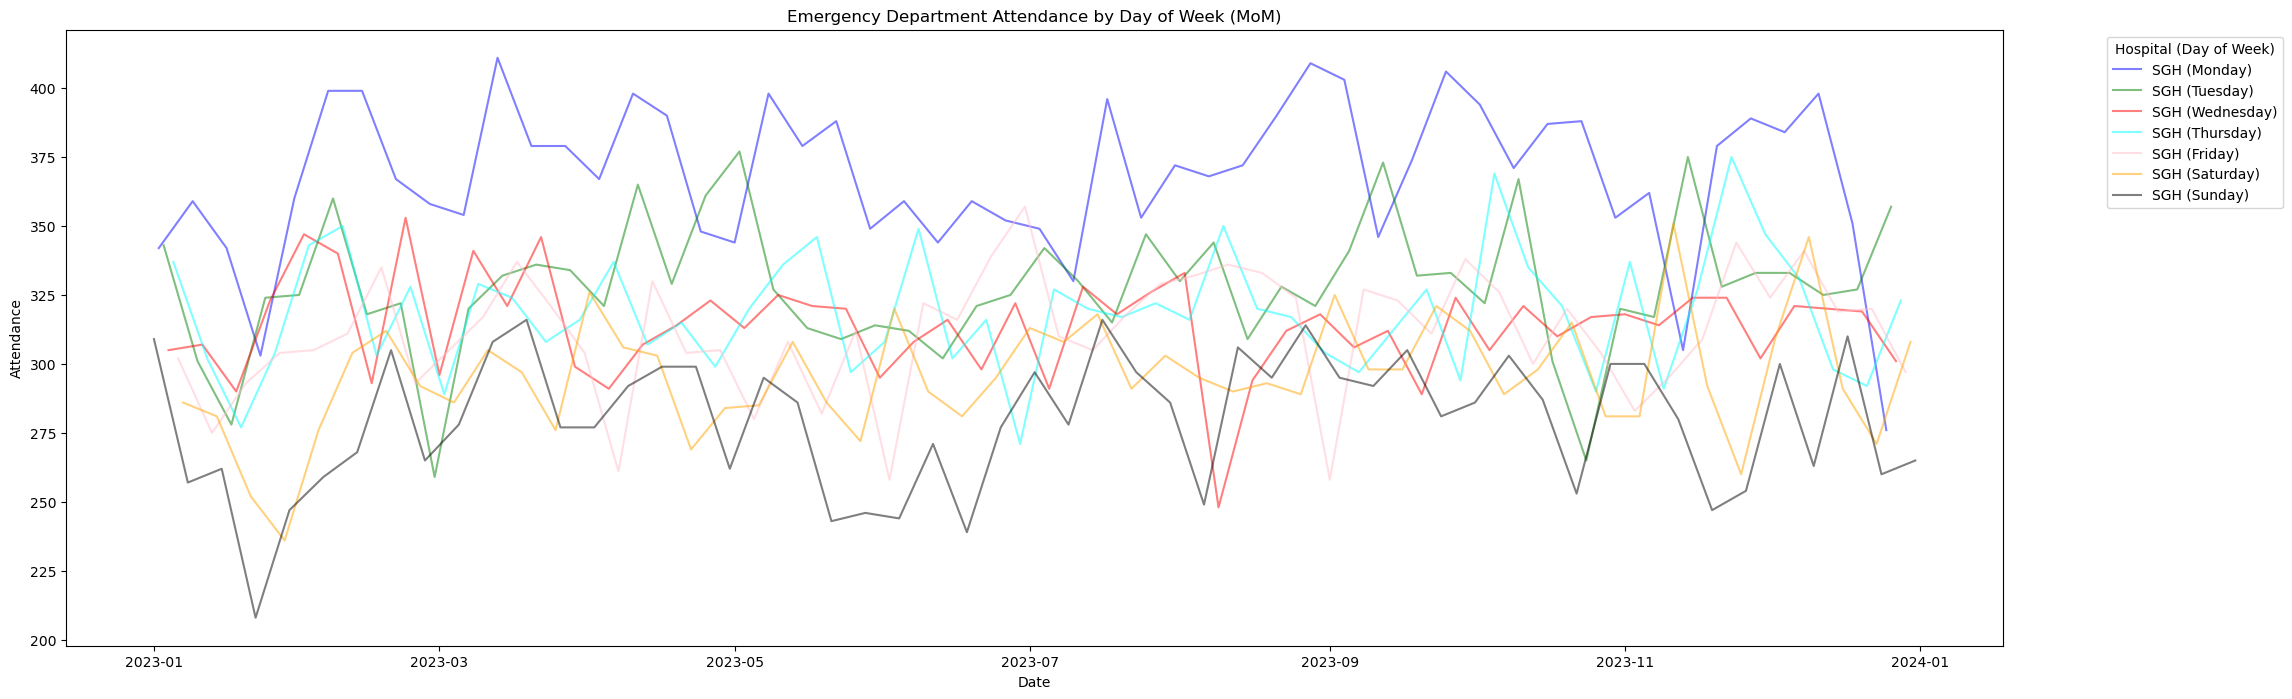

In [417]:
# Define a dictionary to map days of the week to colors
day_colors = {
    'Monday': 'blue',
    'Tuesday': 'green',
    'Wednesday': 'red',
    'Thursday': 'cyan',
    'Friday': 'pink',
    'Saturday': 'orange',
    'Sunday': 'black'
}

# Plot each day of the week on the same plot
plt.figure(figsize=(25, 8))

# Loop through each day of the week and plot
for day, color in day_colors.items():
    daily_data = df_2023[df_2023['DayOfWeek'] == day]
    for hospital in hospitals:  # Exclude DATE and DayOfWeek columns
        plt.plot(daily_data['Date'], daily_data[hospital], label=f'{hospital} ({day})', color=color, alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Attendance')
plt.title('Emergency Department Attendance by Day of Week (MoM)')
plt.legend(title='Hospital (Day of Week)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **Insights**
- Not much insights can be drawn from this plot.
- It will be more interpretable if we compare average attendance by day of the week across 2023

## 3.4 Compare Average Attendance by Day of Week

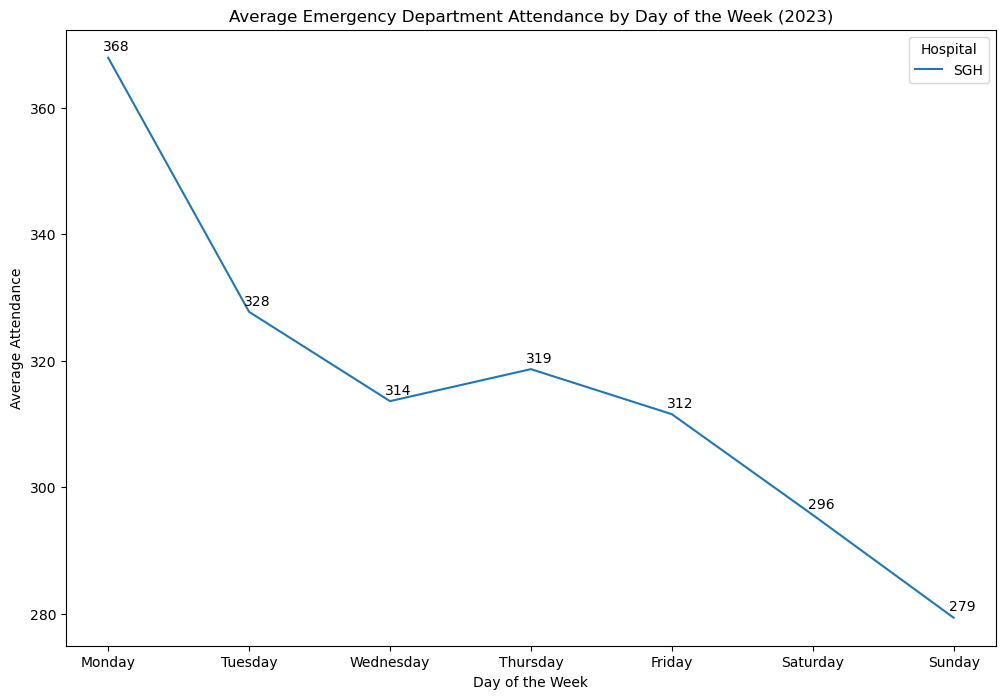

In [418]:
# Calculate the average attendance for each day of the week
avg_attendance = df_2023.groupby('DayOfWeek').mean().reset_index()

# Sort by the custom order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_attendance['DayOfWeek'] = pd.Categorical(avg_attendance['DayOfWeek'], categories=days_order, ordered=True)
avg_attendance = avg_attendance.sort_values('DayOfWeek')

# Plot the average attendance for each day of the week
plt.figure(figsize=(12, 8))

for hospital in hospitals:  # Exclude DATE, Year, and DayOfWeek columns
    plt.plot(avg_attendance['DayOfWeek'], avg_attendance[hospital], label=hospital)
    for i, value in enumerate(avg_attendance[hospital]):
        plt.annotate(f'{value:.0f}', (avg_attendance['DayOfWeek'].iloc[i], value), textcoords="offset points", xytext=(6,5), ha='center')

plt.xlabel('Day of the Week')
plt.ylabel('Average Attendance')
plt.title('Average Emergency Department Attendance by Day of the Week (2023)')
plt.legend(title='Hospital')
plt.show()

### **Insights**
Comparing the average SGH ED attendance of each day of the week in 2023, we can see the following:
- Highest number on Mondays
- Largest drop from Mondays to Tuesdays
- Further drop from Tuesdays to Wednesdays
- Slight increase from Wednesdays to Thursdays
- Further drop from Thursdays to Fridays, where Fridays fall slightly below Wednesdays
- Further decline from Fridays to Saturdays
- Further decline from Fridays to Sundays, Sundays being the lowest

We can conclude the following:
- ED requires the highest number of manpower on Mondays, lowest on weekends
- Manpower can be tapered off from Fridays towards the weekend.

## 3.5 Compare Attendance by Public Holiday & Non-Public Holiday
### 3.5.1 Plot Attendance by Public Holiday & Non-Public Holiday

In [419]:
# Create a list of public_holidays in 2023
public_holidays = [
    '2023-01-01', '2023-01-02', '2023-01-22', '2023-01-23', '2023-01-24',
    '2023-04-07', '2023-04-22', '2023-05-01', '2023-06-02', '2023-06-29',
    '2023-08-09', '2023-09-01', '2023-11-12', '2023-11-13', '2023-12-25'
]

In [420]:
# Identify public holiday attendance and non-public holiday attendance
df_2023['Is_Public_Holiday'] = df_2023['Date'].isin(public_holidays)
df_2023

C:\Users\Shecey\AppData\Local\Temp\ipykernel_428\3150010727.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH,Year,Month,DayOfWeek,Is_Public_Holiday
0,2023-01-01,64,351,286,252,257,309,333,336,2023,1,Sunday,True
1,2023-01-02,61,386,326,314,334,342,346,370,2023,1,Monday,True
2,2023-01-03,76,436,401,364,352,343,397,422,2023,1,Tuesday,False
3,2023-01-04,74,354,311,330,286,305,327,361,2023,1,Wednesday,False
4,2023-01-05,61,373,335,320,309,337,351,366,2023,1,Thursday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,61,370,335,329,323,301,346,357,2023,12,Wednesday,False
361,2023-12-28,69,341,336,331,285,323,336,382,2023,12,Thursday,False
362,2023-12-29,70,328,316,308,264,297,313,343,2023,12,Friday,False
363,2023-12-30,57,363,305,278,259,308,306,332,2023,12,Saturday,False


In [421]:
# Extract public holiday and non-public holiday attendance data
public_holiday_attendance = df_2023[df_2023['Is_Public_Holiday']]['SGH']
non_public_holiday_attendance = df_2023[~df_2023['Is_Public_Holiday']]['SGH']
len(public_holiday_attendance), len(non_public_holiday_attendance)

(15, 350)

In [422]:
# Calculate the average attendance for public holidays and non-public holidays
average_public_holiday_attendance = public_holiday_attendance.mean()
average_non_public_holiday_attendance = non_public_holiday_attendance.mean()

average_public_holiday_attendance, average_non_public_holiday_attendance

(283.73333333333335, 317.66857142857145)

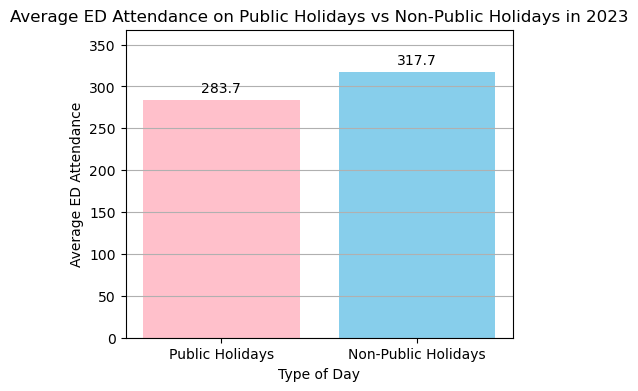

In [423]:
# Plotting the averages
plt.figure(figsize=(5, 4))

# Bar plot for average attendance
labels = ['Public Holidays', 'Non-Public Holidays']
averages = [average_public_holiday_attendance, average_non_public_holiday_attendance]

bars = plt.bar(labels, averages, color=['pink', 'skyblue'])

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Type of Day')
plt.ylabel('Average ED Attendance')
plt.title('Average ED Attendance on Public Holidays vs Non-Public Holidays in 2023')
plt.ylim(0, max(averages) + 50)
plt.grid(True, axis='y')

plt.show()

#### **Insights**
- By visually comparing both bar graphs, there seems to be a difference in SGH attendance between public holidays and non-public holidays in 2023.
- However, it will be more conclusive to do a T-Test to detect if there is a difference.

### 3.5.2 Conduct T-Test (two-tailed) to detect difference

Define null hypothesis ($H_0$) and alternative hypothesis ($H_a$).
- $H_0$: There is **no** difference in SGH attendance between public holidays and non-public holidays in 2023
- $H_a$: There is **a** difference in SGH attendance between public holidays and non-public holidays in 2023

First, we need to determine if variance are different.
The two groups are SGH attendance between public holidays and non-public holidays in 2023.
- $H_0$: The variances of the two groups are equal.
- $H_a$: The variances of the two groups are not equal.

In [424]:
# Perform Levene's test to compare variances
stat, p_value = levene(public_holiday_attendance, non_public_holiday_attendance)

print(f'Levene\'s statistic: {stat}')
print(f'p-value: {p_value}')

Levene's statistic: 0.3668198469219619
p-value: 0.5451213350705262


- **p-value > 0.05:** Fail to reject the null hypothesis. 
- This indicates that there is **no difference in the variances between the attendance numbers on public holidays and non-public holidays**
- Proceed to do basic t-test

In [425]:
# Perform t-test
t_stat, t_p_value = ttest_ind(public_holiday_attendance, non_public_holiday_attendance)

print(f't-statistic: {t_stat}')
print(f'p-value: {t_p_value}')

t-statistic: -3.82314585475487
p-value: 0.00015502406161089837


#### Inference
- **p-value < 0.05:** Reject the null hypothesis. 
- This indicates that **there is a difference in SGH attendance between public holidays and non-public holidays in 2023**


#### **Insights**
We can conclude the following:
- ED requires less manpower on public holidays
- Manpower can be reduced for public holidays


---
## 3.6 Compare Attendance by Public Holiday & Weekends against Non-Public Holiday & Weekdays

In [426]:
# Filter weekends
weekends = df_2023[df_2023['DayOfWeek'].isin(['Saturday', 'Sunday'])]

### Combine PH & Weekends

In [427]:
# Combine public holidays and weekends
public_holidays_and_weekends = pd.concat([df_2023[df_2023['Is_Public_Holiday']], weekends]).drop_duplicates()
public_holidays_and_weekends

,Date,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH,Year,Month,DayOfWeek,Is_Public_Holiday
0,2023-01-01,64,351,286,252,257,309,333,336,2023,1,Sunday,True
1,2023-01-02,61,386,326,314,334,342,346,370,2023,1,Monday,True
21,2023-01-22,39,288,239,273,162,208,285,278,2023,1,Sunday,True
22,2023-01-23,57,340,293,291,245,303,312,352,2023,1,Monday,True
23,2023-01-24,45,360,338,358,268,324,368,363,2023,1,Tuesday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,2023-12-17,83,322,291,270,236,310,287,319,2023,12,Sunday,False
356,2023-12-23,53,302,301,274,279,271,304,322,2023,12,Saturday,False
357,2023-12-24,55,309,269,267,237,260,302,316,2023,12,Sunday,False
363,2023-12-30,57,363,305,278,259,308,306,332,2023,12,Saturday,False


In [428]:
# Extract public holidays and weekends for SGH
public_holidays_and_weekends['SGH']

0      309
1      342
21     208
22     303
23     324
      ... 
350    310
356    271
357    260
363    308
364    265
Name: SGH, Length: 116, dtype: int64

### Combine Non-PH & Weekdays

In [429]:
# Identify non-public holidays and weekdays
non_public_holidays_and_weekdays = df_2023[~df_2023.index.isin(public_holidays_and_weekends.index)]
non_public_holidays_and_weekdays

,Date,AH,CGH,KTPH,NTFGH,NUH(A),SGH,SKH,TTSH,Year,Month,DayOfWeek,Is_Public_Holiday
2,2023-01-03,76,436,401,364,352,343,397,422,2023,1,Tuesday,False
3,2023-01-04,74,354,311,330,286,305,327,361,2023,1,Wednesday,False
4,2023-01-05,61,373,335,320,309,337,351,366,2023,1,Thursday,False
5,2023-01-06,49,353,305,287,304,302,340,350,2023,1,Friday,False
8,2023-01-09,83,398,379,382,341,359,409,426,2023,1,Monday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2023-12-22,59,332,284,267,271,320,304,338,2023,12,Friday,False
359,2023-12-26,91,397,339,363,347,357,398,394,2023,12,Tuesday,False
360,2023-12-27,61,370,335,329,323,301,346,357,2023,12,Wednesday,False
361,2023-12-28,69,341,336,331,285,323,336,382,2023,12,Thursday,False


In [430]:
# Extract non-public holidays and weekdays for SGH
non_public_holidays_and_weekdays['SGH']

2      343
3      305
4      337
5      302
8      359
      ... 
355    320
359    357
360    301
361    323
362    297
Name: SGH, Length: 249, dtype: int64

### 3.6.1 Plot Attendance by Public Holiday & Weekends against Non-Public Holiday & Weekdays

In [431]:
# Calculate the average attendance for public holidays + weekends and non-public holidays + weekdays
average_public_holidays_and_weekends = public_holidays_and_weekends['SGH'].mean()
average_non_public_holidays_and_weekdays = non_public_holidays_and_weekdays['SGH'].mean()

print(f'Average SGH attendance on public holidays and weekends: {average_public_holidays_and_weekends}')
print(f'Average SGH attendance on non-public holidays and weekdays: {average_non_public_holidays_and_weekdays}')

Average SGH attendance on public holidays and weekends: 287.6896551724138
Average SGH attendance on non-public holidays and weekdays: 329.5903614457831


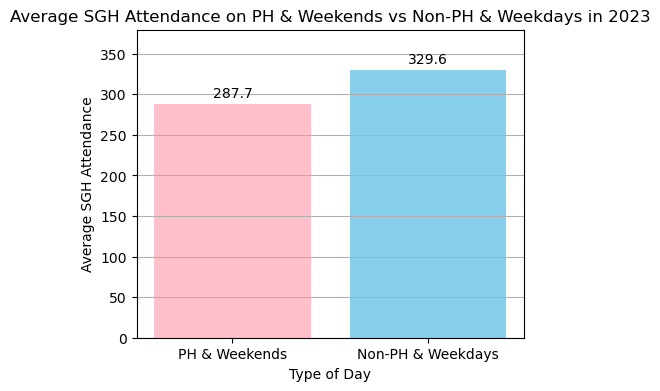

In [432]:
# Plotting the averages
plt.figure(figsize=(5, 4))

# Bar plot for average attendance
labels = ['PH & Weekends', 'Non-PH & Weekdays']
averages = [average_public_holidays_and_weekends, average_non_public_holidays_and_weekdays]

bars = plt.bar(labels, averages, color=['pink', 'skyblue'])

# Adding annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Type of Day')
plt.ylabel('Average SGH Attendance')
plt.title('Average SGH Attendance on PH & Weekends vs Non-PH & Weekdays in 2023')
plt.ylim(0, max(averages) + 50)
plt.grid(True, axis='y')

plt.show()

#### **Insights**
- By visually comparing both bar graphs, there seems to be a difference in SGH attendance between public holidays & weekends, and non-public holidays & weekdays in 2023.
- However, it will be more conclusive to do a T-Test to detect if there is a difference.

### 3.6.2 Conduct T-Test (two-tailed) to detect difference

Define null hypothesis ($H_0$) and alternative hypothesis ($H_a$).
- $H_0$: There is **no** difference in SGH attendance between public holidays & weekends versus non-public holidays & weekdays in 2023
- $H_a$: There is **a** difference in SGH attendance between public holidays & weekends versus non-public holidays & weekdays in 2023

First, we need to determine if variance are different.
The two groups are SGH attendance between public holidays & weekends versus non-public holidays & weekdays in 2023.
- $H_0$: The variances of the two groups are equal.
- $H_a$: The variances of the two groups are not equal.

In [380]:
# Perform Levene's test to compare variances
stat, p_value = levene(public_holidays_and_weekends['SGH'], non_public_holidays_and_weekdays['SGH'])

print(f'Levene\'s statistic: {stat}')
print(f'p-value: {p_value}')

Levene's statistic: 1.7682825065002796
p-value: 0.1844297494454139


- **p-value > 0.05:** Fail to reject the null hypothesis. 
- This indicates that there is **no difference in the variances between the attendance numbers on public holidays & weekends and non-public holidays & weekdays**
- Proceed to do basic t-test

In [381]:
# Perform t-test
t_stat, t_p_value = ttest_ind(public_holidays_and_weekends['SGH'], non_public_holidays_and_weekdays['SGH'])

print(f't-statistic: {t_stat}')
print(f'p-value: {t_p_value}')


t-statistic: -13.210132866683614
p-value: 8.351724570316208e-33


#### Inference
- **p-value < 0.05:** Reject the null hypothesis. 
- This indicates that **there a difference in SGH attendance between public holidays & weekends versus non-public holidays & weekdays in 2023**


#### **Insights**
We can conclude the following:
- ED requires less manpower on public holidays & weekends
- Manpower can be reduced for public holidays & weekends

---
# 4. Conclusions & Recommendations

**Main Conclusions**
- SGH ED requires the highest number of manpower on Mondays, lowest on weekends
- SGH ED requires less manpower on public holidays & weekends

**Recommendations**
- Minimise SGH ED staff from applying for leave on Mondays unless absolutely urgent/necessary.
- Allow for higher number of SGH ED staff to apply for leave on public holidays and from Fridays to Sundays compared to the rest of the week.
- Fewer SGH ED staff should be granted leave on Fridays compared to Saturdays.
- Fewer SGH ED staff should be granted leave on Saturdays compared to Sundays.

---